# CRITT TPR-DB Data Analysis Demo
## Varying Levels of Analysis

In [1]:
pip install tprdbreader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import sys
import os.path
import glob
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from tprdbreader import readTPRDBtable_GCP

# The Session (each text = one text-production session)

In [ ]:
# read SS tables
studies = ["BML12_re"]
ext = "ss"        # session table information
df = readTPRDBtable_GCP(studies, ext, user = "TPRDB", verbose=1)

BML12_re	#sessions: 184	.ss:184


## .ss table: each row is one text-production session

In [3]:
pd.set_option('display.max_columns', None)

sessions.head(10)

,Study,Session,SL,TL,Part,Text,Task,ALseg,STseg,TTseg,Dur,TimeD,TimeR,Break,FDur,D5000,D1000,N1000,Scatter,FixS,TrtS,FixT,TrtT,Ins,Del,MDns,MDel,AIns,ADel,SIns,SDel,TokS,LenS,TokT,LenT
0,BML12_re,P01_E5,en,es,P01,5,E,6,6,6,310234,114139,232656,0,281250,75062,23357,29,18,3,167,661,68214,85,93,85,93,0,0,0,0,139,788,153,840
1,BML12_re,P01_E6,en,es,P01,6,E,7,7,7,434250,27156,416000,0,428359,87157,48749,35,18,6,368,2381,308456,151,143,151,143,0,0,0,0,139,779,161,941
2,BML12_re,P01_P3,en,es,P01,3,P,5,5,5,416468,77547,323547,0,386953,27186,16295,14,11,548,71980,390,30970,51,48,51,48,0,0,0,0,146,857,162,915
3,BML12_re,P01_P4,en,es,P01,4,P,5,5,5,268328,71234,264765,0,264765,29407,14472,15,9,551,78224,236,18668,77,62,77,62,0,0,0,0,110,668,131,763
4,BML12_re,P01_T1,en,es,P01,1,T,10,11,10,757281,92016,525203,0,746828,293552,210411,72,26,1122,115692,392,26605,1152,186,1152,186,0,0,0,0,160,838,180,964
5,BML12_re,P01_T2,en,es,P01,2,T,7,7,7,740484,98031,491578,0,729906,358421,206464,92,27,990,138879,282,25127,1201,142,1201,142,0,0,0,0,153,847,186,1057
6,BML12_re,P02_E1,en,es,P02,1,E,10,11,10,334313,5828,257344,0,322422,102452,46840,37,23,3,184,2150,244012,134,104,134,104,0,0,0,0,160,838,182,970
7,BML12_re,P02_E2,en,es,P02,2,E,7,7,7,258297,25766,250407,0,250750,35720,18611,24,16,0,0,1887,189768,52,47,52,47,0,0,0,0,153,847,185,1012
8,BML12_re,P02_P5,en,es,P02,5,P,6,6,6,467547,45094,347531,0,458562,65266,45000,31,19,978,95446,3199,249222,95,109,95,109,0,0,0,0,139,788,150,834
9,BML12_re,P02_P6,en,es,P02,6,P,7,7,7,441328,44562,348438,0,427797,115598,60737,39,18,825,73060,2602,214613,170,174,170,174,0,0,0,0,139,779,159,929


## How many sessions?

In [4]:
sessions.shape

(184, 35)

## Inspect Data Table a bit

In [5]:
x = 'Part'
print(set(sessions[x]))
print("Number of " + x + "s: " + str(len(set(sessions[x]))))

{'P28', 'P05', 'P30', 'P27', 'P12', 'P31', 'P11', 'P15', 'P29', 'P25', 'P09', 'P17', 'P14', 'P03', 'P32', 'P10', 'P24', 'P04', 'P23', 'P26', 'P07', 'P20', 'P19', 'P08', 'P01', 'P13', 'P16', 'P22', 'P06', 'P02', 'P21', 'P18'}
Number of Parts: 32


## Fun graphs!

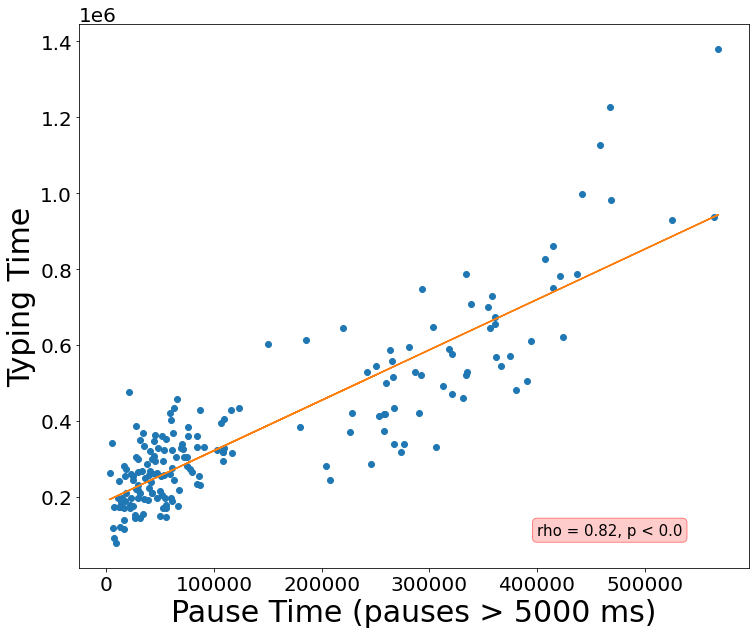

In [4]:
x = sessions['D5000']
y = sessions['FDur']

corr1 = scipy.stats.spearmanr(x, y)
corr_coeff1 = str(round(corr1.correlation, 2))
corr_pValue1 = str(round(corr1.pvalue, 3))

corr1_infoString = "rho = " + corr_coeff1 + ", p < " + corr_pValue1

plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Pause Time (pauses > 5000 ms)", fontsize = 30)
plt.ylabel("Typing Time", fontsize = 30)

plt.text(400000, 100000, corr1_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

plt.plot(x, y, 'o')


m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

# Task

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


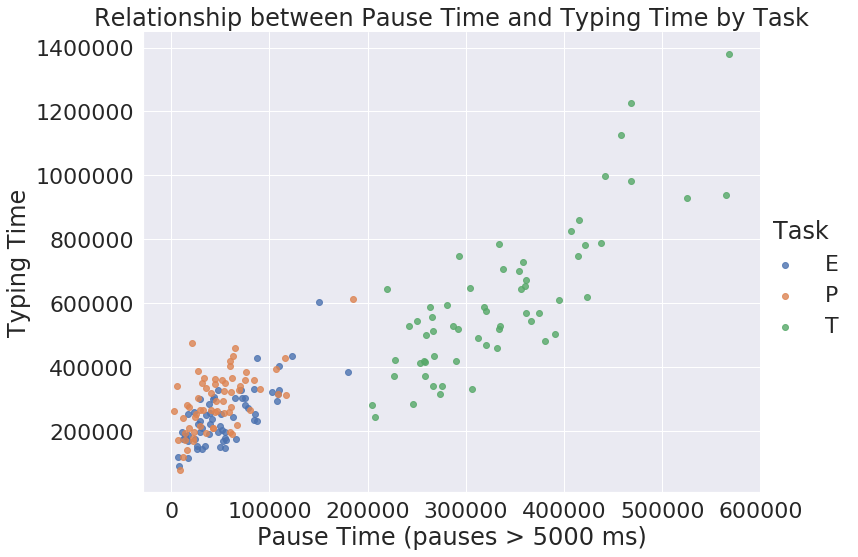

In [8]:
#aspect=.75
sns.set(font_scale = 2)
ax0 = sns.lmplot('D5000', 'FDur', data=sessions, hue='Task', fit_reg=False, height=8, aspect=1.4)

ax0.set(ylabel='Typing Time', xlabel='Pause Time (pauses > 5000 ms)', title='Relationship between Pause Time and Typing Time by Task')

plt.show()

In [9]:
ss_groupedByTask = sessions.groupby("Task").mean().reset_index()
ss_groupedByTask

,Task,Text,ALseg,STseg,TTseg,Dur,TimeD,TimeR,Break,FDur,D5000,D1000,N1000,Scatter,FixS,TrtS,FixT,TrtT,Ins,Del,MDns,MDel,AIns,ADel,SIns,SDel,TokS,LenS,TokT,LenT
0,E,3.566667,6.683333,6.833333,6.716667,267934.683333,23107.733333,223029.166667,0.0,245407.300000,54993.816667,28355.650000,23.933333,15.150000,6.100000,899.733333,433.516667,70377.750000,111.316667,108.766667,111.316667,108.766667,0.0,0.0,0.0,0.0,140.933333,795.033333,159.900000,898.933333
1,P,3.500000,6.734375,6.812500,6.750000,319453.156250,32749.234375,260945.375000,0.0,293715.593750,48080.875000,24829.187500,23.187500,14.093750,180.187500,24684.578125,552.078125,57890.750000,104.421875,106.156250,104.421875,106.156250,0.0,0.0,0.0,0.0,140.562500,793.468750,159.625000,897.687500
2,T,3.416667,6.616667,6.850000,6.750000,630727.016667,30782.483333,512356.116667,0.0,605780.083333,334364.983333,217497.483333,78.600000,16.833333,531.916667,79258.100000,699.566667,88462.866667,1089.866667,180.000000,1089.866667,180.000000,0.0,0.0,0.0,0.0,141.400000,797.466667,160.266667,909.100000


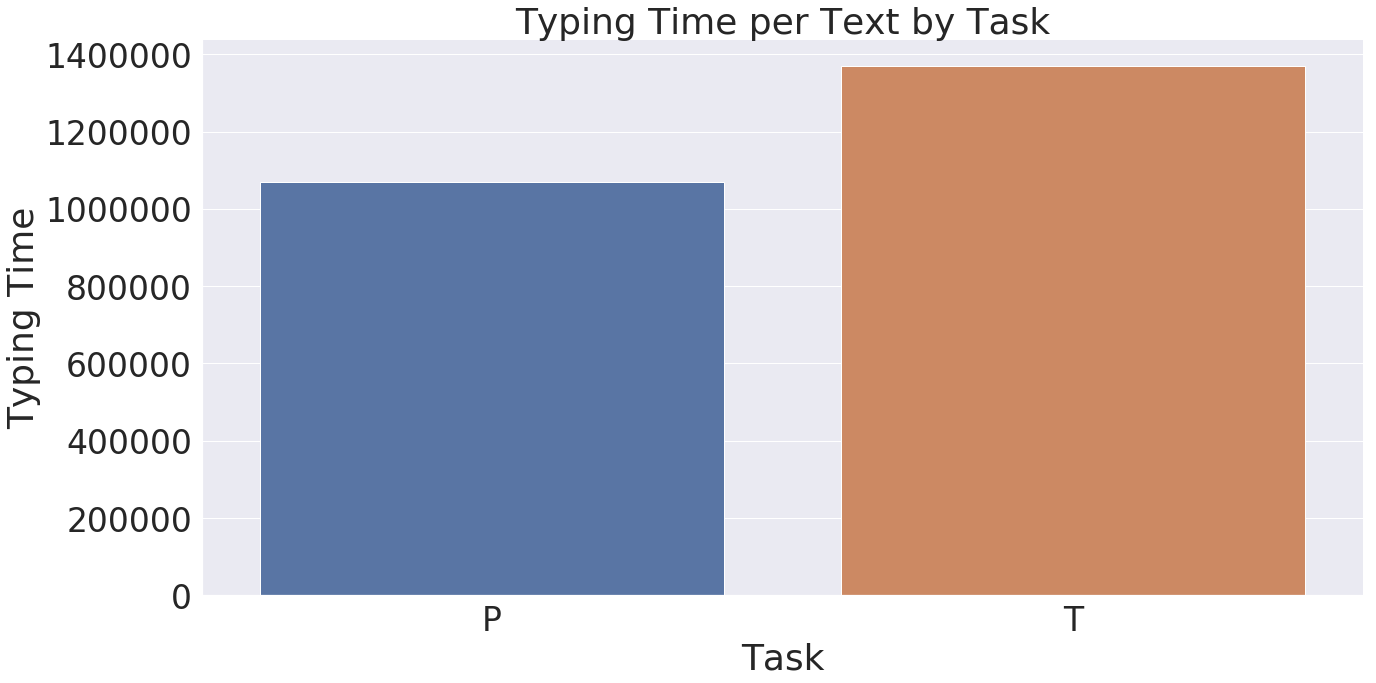

In [10]:
sns.set(font_scale = 3)
ax1 = sns.catplot(x="Task",
                 y="FDur",
                 kind="bar",
                 data=ss_groupedByTask,
                 height=10,
                 aspect=2
                )
ax1.set(ylabel='Typing Time', xlabel='Task', title='Typing Time per Text by Task')
plt.show()

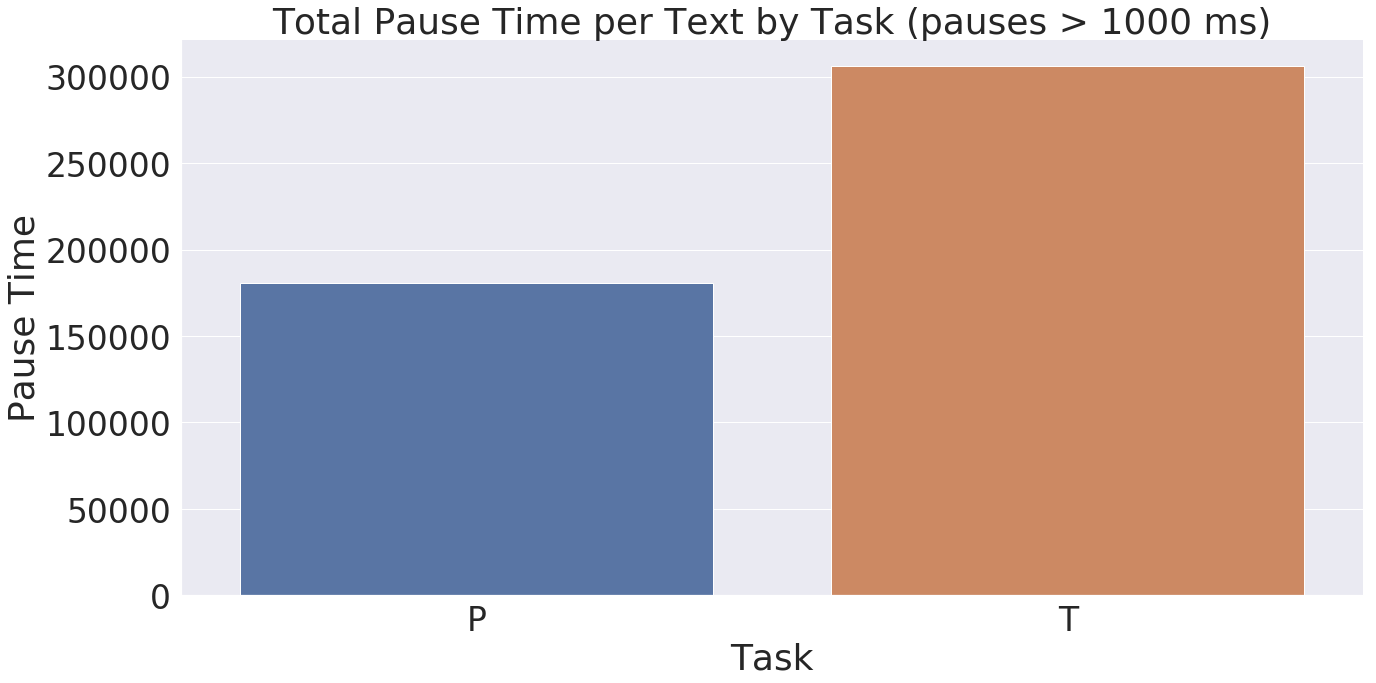

In [12]:
ax4 = sns.catplot(x="Task",
                 y="D1000",
                 kind="bar",
                 data=ss_groupedByTask,
                 height=10,
                 aspect=2
                )
ax4.set(ylabel='Pause Time', xlabel='Task', title='Total Pause Time per Text by Task (pauses > 1000 ms)')
plt.show()

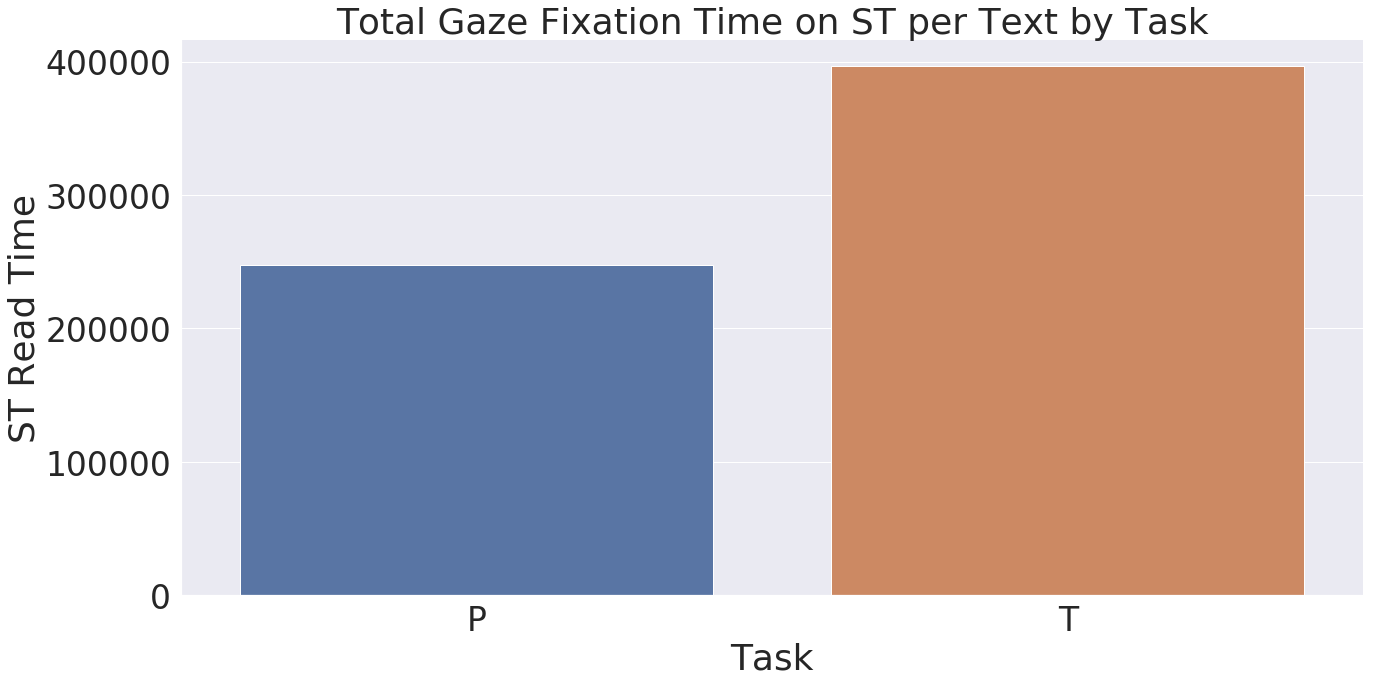

In [13]:
ax2 = sns.catplot(x="Task",
                 y="TrtS",
                 kind="bar",
                 data=ss_groupedByTask,
                 height=10,
                 aspect=2
                )
ax2.set(ylabel='ST Read Time', xlabel='Task', title='Total Gaze Fixation Time on ST per Text by Task')
plt.show()

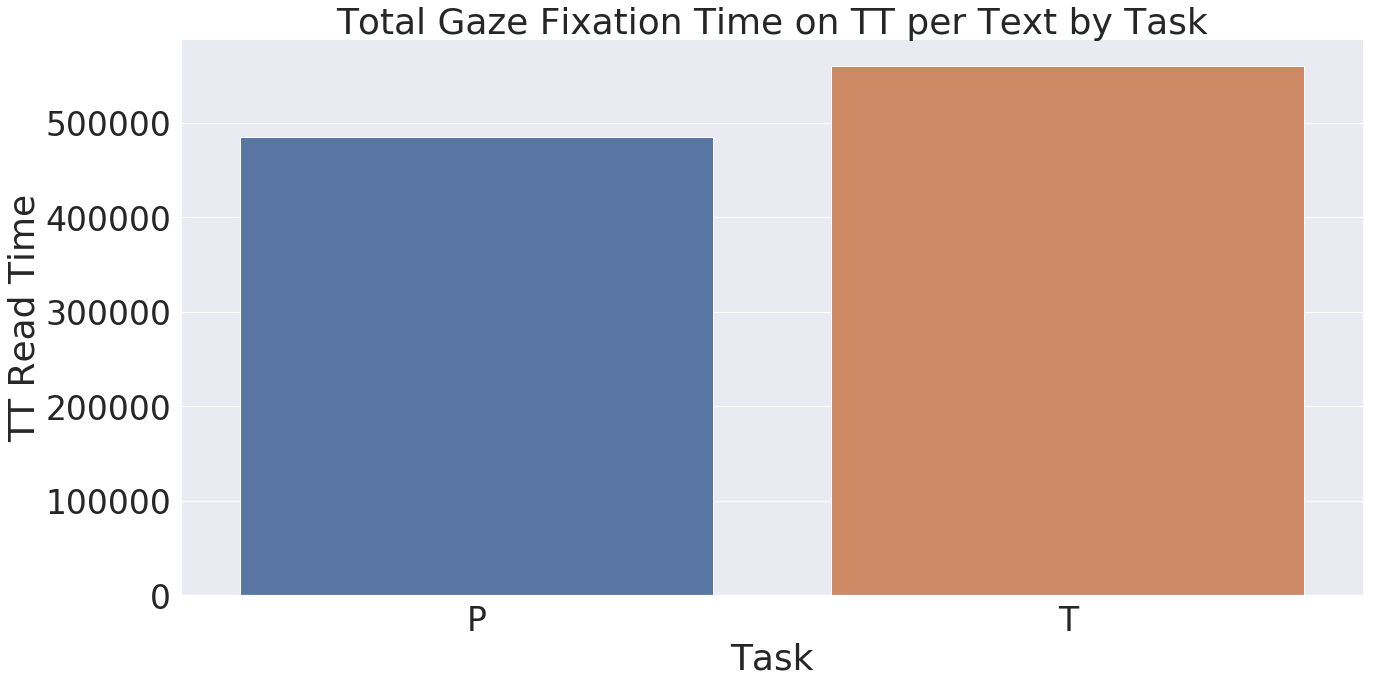

In [14]:
ax3 = sns.catplot(x="Task",
                 y="TrtT",
                 kind="bar",
                 data=ss_groupedByTask,
                 height=10,
                 aspect=2
                )
ax3.set(ylabel='TT Read Time', xlabel='Task', title='Total Gaze Fixation Time on TT per Text by Task')
plt.show()

# By Text (text 1, 2, 3, 4, 5, 6)

In [15]:
ss_groupedByText = sessions.groupby("Text").mean().reset_index()
ss_groupedByText

,Text,ALseg,STseg,TTseg,Dur,TimeD,TimeR,Break,FDur,D5000,D1000,N1000,Scatter,FixS,TrtS,FixT,TrtT,Ins,Del,MDns,MDel,AIns,ADel,SIns,SDel,TokS,LenS,TokT,LenT
0,1,10.866667,11.0,10.866667,1.111382e+06,22823.933333,1.006656e+06,0.0,1.082443e+06,520089.266667,225840.800000,194.400000,33.800000,1555.466667,237087.133333,2765.666667,500273.666667,719.466667,395.800000,719.466667,395.800000,0.0,0.0,0.0,0.0,160.0,838.0,169.333333,779.400000
1,2,7.000000,7.0,7.000000,1.139876e+06,50754.578947,1.049423e+06,0.0,1.112719e+06,490607.947368,250500.842105,163.684211,28.473684,1721.473684,279335.842105,2859.473684,534553.210526,762.315789,497.052632,762.315789,497.052632,0.0,0.0,0.0,0.0,153.0,847.0,165.631579,805.684211
2,3,4.928571,5.0,4.928571,1.532196e+06,56881.214286,1.240776e+06,0.0,1.493801e+06,661731.714286,274074.071429,252.000000,33.142857,2773.071429,418166.071429,3831.785714,551521.500000,852.357143,510.357143,852.357143,510.357143,0.0,0.0,0.0,0.0,146.0,857.0,160.285714,788.214286
3,4,5.000000,5.0,5.058824,1.219722e+06,49668.823529,1.060893e+06,0.0,1.177874e+06,474685.117647,234330.294118,165.647059,27.000000,1926.058824,321165.352941,3347.529412,524218.000000,634.000000,381.000000,634.000000,381.000000,0.0,0.0,0.0,0.0,110.0,668.0,127.294118,644.058824
4,5,5.944444,6.0,5.944444,1.251635e+06,22250.111111,1.100222e+06,0.0,1.221851e+06,510651.666667,205415.944444,201.055556,32.833333,1945.722222,312731.722222,3063.666667,521517.444444,644.666667,399.777778,644.666667,399.777778,0.0,0.0,0.0,0.0,139.0,788.0,148.777778,725.111111
5,6,6.941176,7.0,6.941176,1.119531e+06,41954.176471,1.001082e+06,0.0,1.082728e+06,436457.529412,192932.882353,165.882353,30.470588,1776.941176,280010.588235,3087.411765,456555.117647,608.882353,411.117647,608.882353,411.117647,0.0,0.0,0.0,0.0,139.0,779.0,139.764706,709.117647


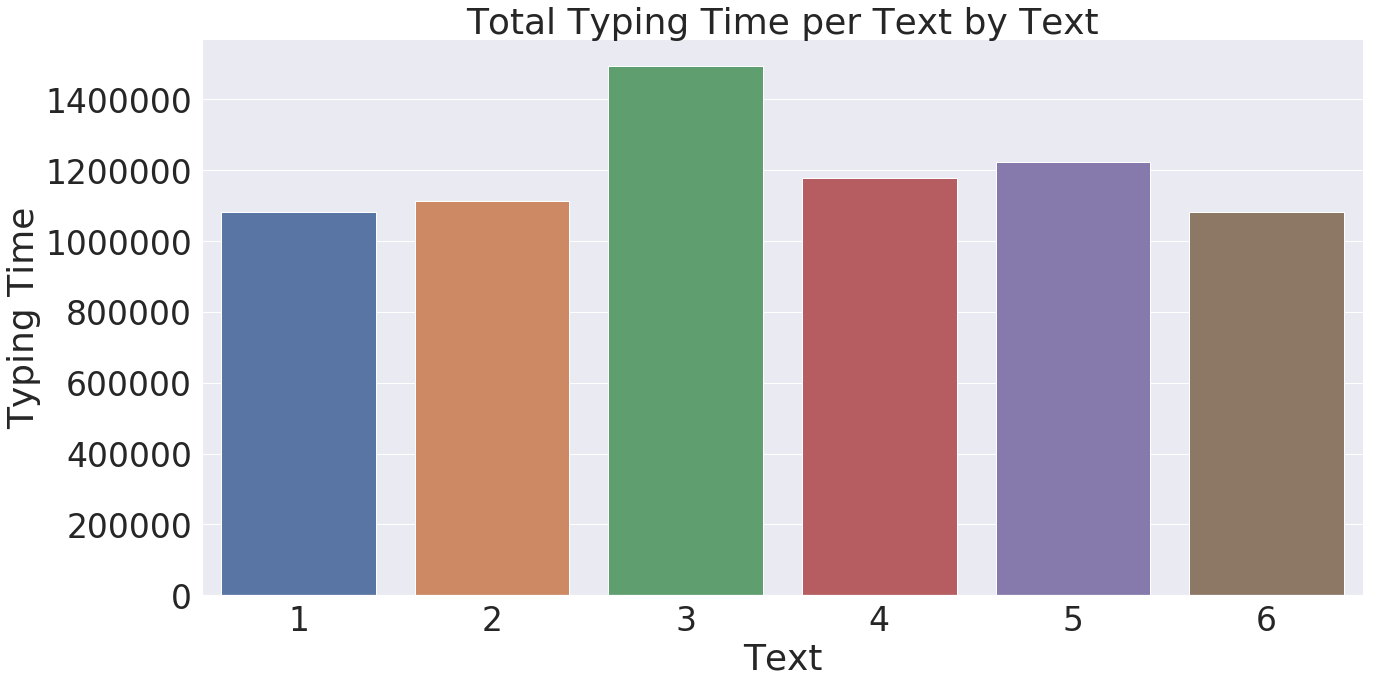

In [16]:
ax4_1 = sns.catplot(x="Text",
                 y="FDur",
                 kind="bar",
                 data=ss_groupedByText,
                 height=10,
                 aspect=2
                )
ax4_1.set(ylabel='Typing Time', xlabel='Text', title='Total Typing Time per Text by Text')
plt.show()

In [17]:
# time per text divided by number of ST tokens
sessions["nDur"] = sessions["FDur"]/sessions["TokS"]

sessions.head(5)

,Study,Session,SL,TL,Part,Text,Task,ALseg,STseg,TTseg,Dur,TimeD,TimeR,Break,FDur,D5000,D1000,N1000,Scatter,FixS,TrtS,FixT,TrtT,Ins,Del,MDns,MDel,AIns,ADel,SIns,SDel,TokS,LenS,TokT,LenT,nDur
0,NJ12,P01_P3,en,hi,P01,3,P,5,5,5,1338364,25491,1168729,0,1307632,277165,157309,111,41,2313,446518,3022,640150,608,576,608,576,0,0,0,0,146,857,163,805,8956.383562
1,NJ12,P01_P4,en,hi,P01,4,P,5,5,5,905617,68500,853871,0,895789,196876,85787,81,42,1305,244620,2165,469750,374,388,374,388,0,0,0,0,110,668,131,639,8143.536364
2,NJ12,P01_P5,en,hi,P01,5,P,6,6,6,1103848,12980,1053241,0,1080448,369068,180462,143,71,1965,289630,2927,467502,830,795,830,795,0,0,0,0,139,788,158,762,7773.007194
3,NJ12,P01_P6,en,hi,P01,6,P,7,7,7,861515,33025,826025,0,844761,266323,117161,112,53,1359,228828,2417,395149,472,594,472,594,0,0,0,0,139,779,139,705,6077.417266
4,NJ12,P01_T1,en,hi,P01,1,T,11,11,11,525848,10920,502183,0,509561,276093,201731,64,13,841,180942,589,175890,849,94,849,94,0,0,0,0,160,838,172,755,3184.756250


In [18]:
ss_groupedByText_n = sessions.groupby("Text").mean().reset_index()

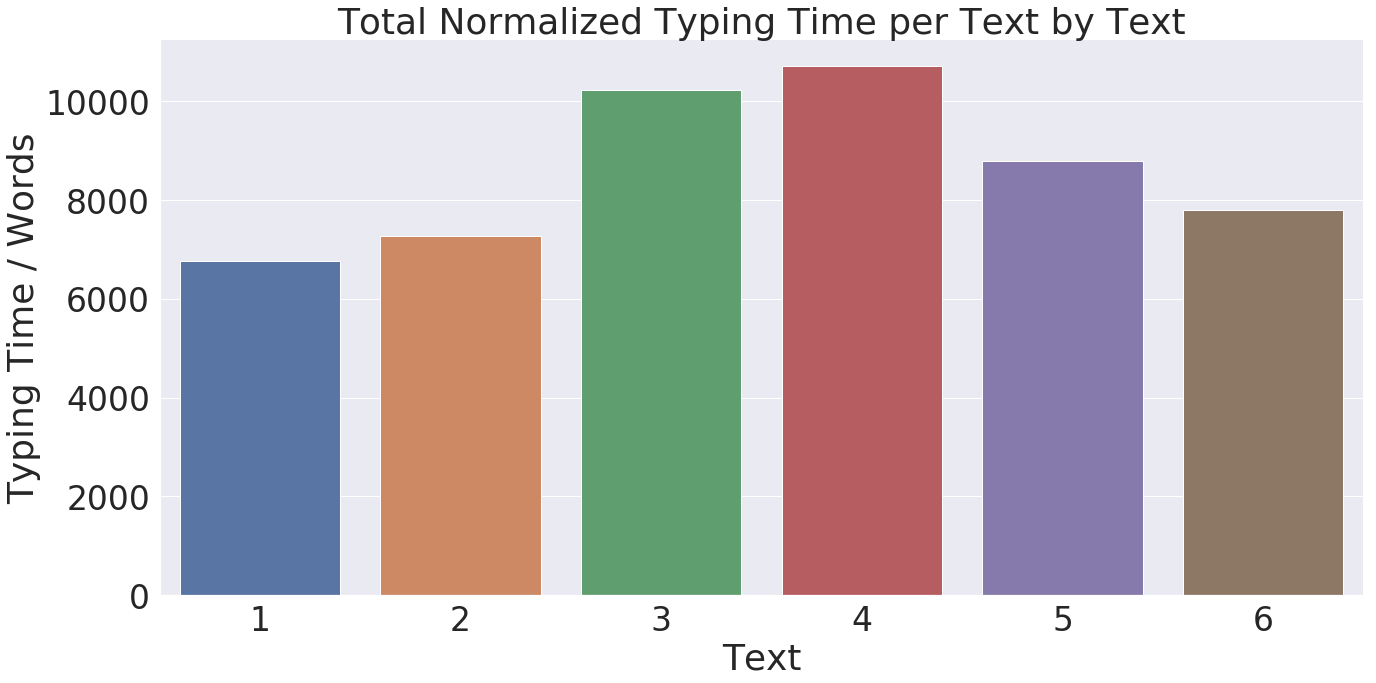

In [19]:
ax4_2 = sns.catplot(x="Text",
                 y="nDur",
                 kind="bar",
                 data=ss_groupedByText_n,
                 height=10,
                 aspect=2
                )
ax4_2.set(ylabel='Typing Time / Words', xlabel='Text', title='Total Normalized Typing Time per Text by Text')
plt.show()

# Participant

In [20]:
ss_groupedByPart = sessions.groupby("Part").mean().reset_index()

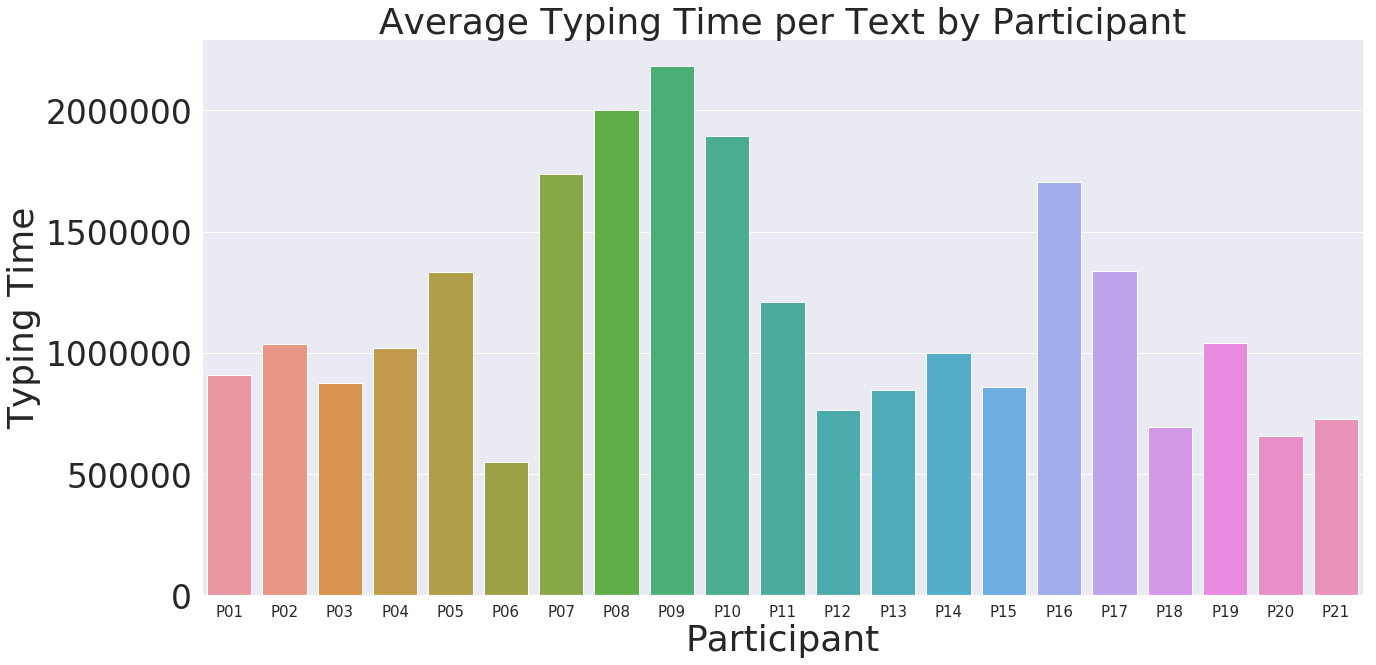

In [21]:
ax5 = sns.catplot(x="Part",
                 y="FDur",
                 kind="bar",
                 data=ss_groupedByPart,
                 height=10,
                 aspect=2
                )
ax5.set(ylabel='Typing Time', xlabel='Participant', title='Average Typing Time per Text by Participant')
ax5.set_xticklabels(size = 15)
plt.show()

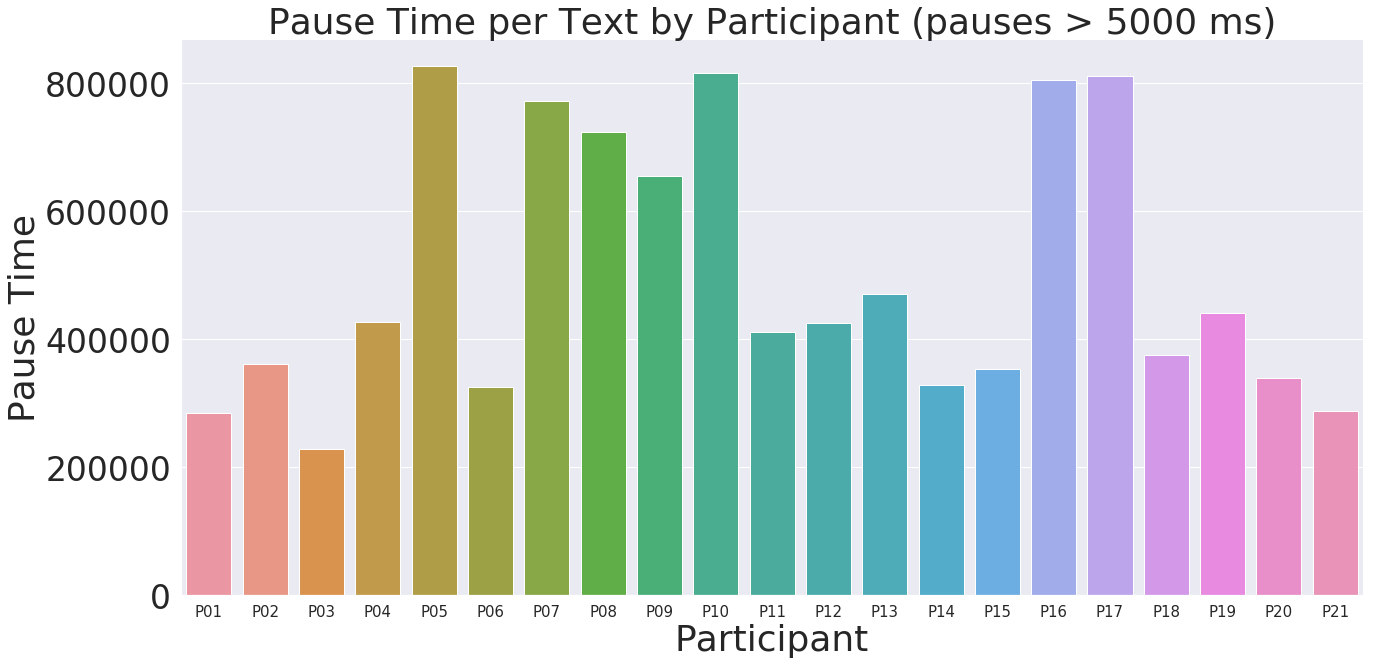

In [23]:
ax6 = sns.catplot(x="Part",
                 y="D5000",
                 kind="bar",
                 data=ss_groupedByPart,
                 height=10,
                 aspect=2
                )
ax6.set(ylabel='Pause Time', xlabel='Participant', title='Pause Time per Text by Participant (pauses > 5000 ms)')
ax6.set_xticklabels(size = 15)
plt.show()

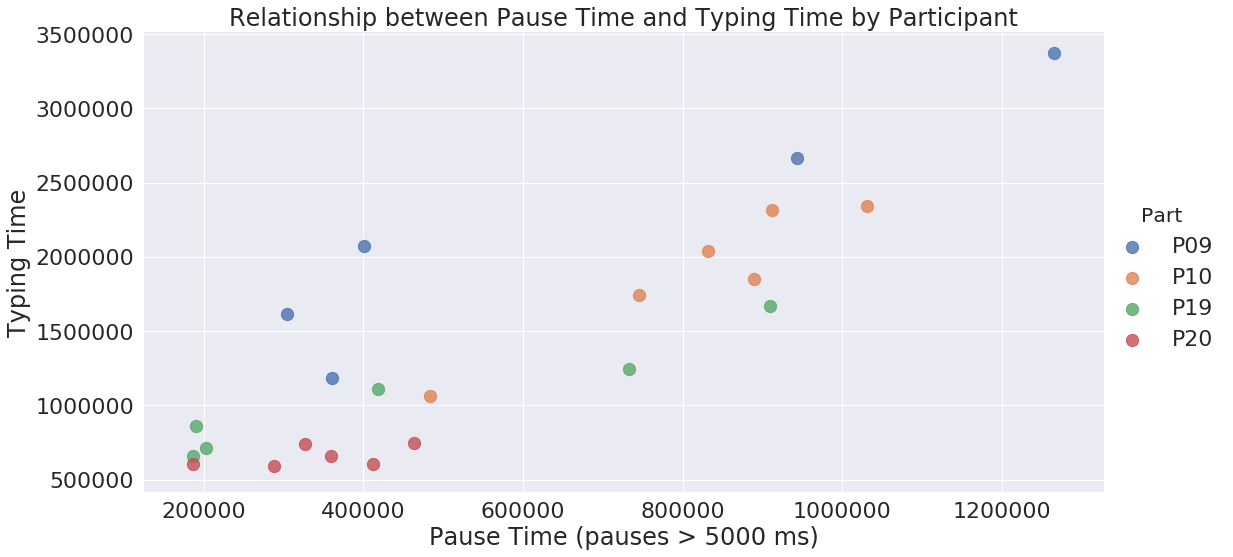

In [34]:
sns.set(font_scale = 2)
listOfParts = ['P09','P20', 'P10', 'P19']
ax8 = sns.lmplot('D5000', 'FDur', data=sessions[sessions['Part'].isin(listOfParts)], hue='Part', fit_reg=False, scatter_kws={"s": 150}, height=8, aspect=2)

ax8.set(ylabel='Typing Time', xlabel='Pause Time (pauses > 5000 ms)', title='Relationship between Pause Time and Typing Time by Participant')

plt.show()

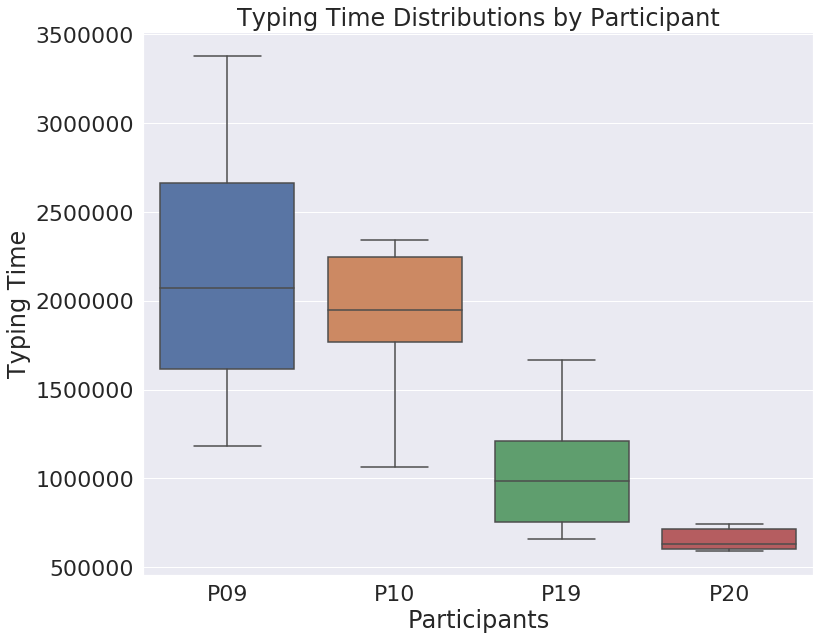

In [35]:
# boxplot per participant
ax10 = sns.boxplot(x="Part", y="FDur", data=sessions[sessions['Part'].isin(listOfParts)])

ax10.set(ylabel='Typing Time', xlabel='Participants', title='Typing Time Distributions by Participant')

plt.show()

# The Segment (i.e., the sentence)
==================================================
## .sg tables: each row is one segment

In [30]:
# read SG tables
segments = TPRDB.readTPRDBtables(["NJ12/Tables/"], "*sg", path="/data/critt/tprdb/TPRDB/", verbose = 1)
segments.head(10)

NJ12/Tables/


,Id,STseg,TTseg,Study,Session,SL,TL,Task,Text,Part,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParalFixS,ParalS,ParalFixT,ParalT,Ins,Del,MIns,MDel,AIns,ADel,SIns,SDel,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TAGnbr,SAGnbr,ISgrpSeg,Cross,ICrossSeg,ITraSeg,ISTCSeg,HTot,HTotN
0,1,1,1,NJ12,P01_P3,en,hi,P,3,P01,1,106487,106487,25491,77579,3417,10,76955,4041,8,75583,5413,6,73774,7222,5,68095,12901,3,3,257,54884,155,32426,22,4264,39,9199,24,17,24,17,0,0,0,0,7,44,10,55,0,---,स्पीलबर्ग_ने_दारफुर_के_खिलाफ_बीजिंग_को_लाल_कार...,1.43,1.00,0.45,3.57,2.01,1.76,2.65,5.64,0.85
1,2,2,2,NJ12,P01_P3,en,hi,P,3,P01,2,225062,225062,8081,197340,19641,51,191741,25240,37,180446,36535,21,168839,48142,13,155922,61059,8,5,367,69556,361,75706,11,4281,205,51580,171,137,171,137,0,0,0,0,31,169,36,176,0,---,चीनी_सरकार_को_प्रतीकात्मक_विरोध_दर्ज_कराने_के_...,2.52,2.35,1.51,7.77,2.97,2.82,3.36,7.24,0.83
2,3,3,3,NJ12,P01_P3,en,hi,P,3,P01,2,443152,443152,5679,404139,33334,69,395029,42444,45,383297,54176,30,362142,75331,16,353015,84458,13,11,771,150488,478,98550,179,35709,184,39430,160,183,160,183,0,0,0,0,37,200,38,180,0,---,उनके_अलग_होने_से_डारफुर_में_संघर्ष_का_परचम_बुल...,2.81,3.22,1.55,5.54,2.72,3.15,3.60,7.11,0.79
3,4,4,4,NJ12,P01_P3,en,hi,P,3,P01,1,182412,182412,11420,164438,6554,24,162146,8846,18,159743,11249,14,158011,12981,13,148636,22356,10,9,319,49232,969,185328,4,1206,73,20383,68,57,68,57,0,0,0,0,37,227,37,195,0,---,"चीन_,_जिसका_सूडानी_तेल_उद्योग_में_व्यापक_निवेश...",1.32,1.49,1.04,3.08,1.66,1.91,2.50,7.48,0.83
4,5,5,5,NJ12,P01_P3,en,hi,P,3,P01,1,350519,350519,827,319005,30687,69,310847,38845,48,300583,49109,34,284798,64894,22,253301,96391,10,13,599,122358,1059,248140,61,9910,190,53121,185,182,185,182,0,0,0,0,34,217,42,199,0,---,इस_बात_पर_जोर_देते_हुए_कि_हो_रहे_अत्याचारों_के...,2.50,2.53,1.45,7.71,3.04,2.70,3.40,7.03,0.79
5,1,1,1,NJ12,P01_P4,en,hi,P,4,P01,1,266652,266652,68500,178842,19310,54,171557,26595,36,163302,34850,24,155472,42680,18,126782,71370,10,8,443,84551,384,72245,157,25549,204,46605,130,136,130,136,0,0,0,0,30,205,37,185,0,---,"हालांकि_,_विकासशील_देश_गरीबों_का_जीवन_-_स्तर_उ...",2.87,2.80,1.89,6.53,3.14,3.04,3.75,7.64,0.85
6,2,2,2,NJ12,P01_P4,en,hi,P,4,P01,1,345059,345059,18050,312783,14226,52,308353,18656,40,301970,25039,30,294951,32058,25,257588,69421,14,18,455,82485,526,109071,82,16019,199,52211,156,153,156,153,0,0,0,0,28,182,42,205,0,---,विकासशील_देशों_को_और_अधिक_हरियाली_पैदा_करने_और...,2.43,1.93,1.76,9.79,3.06,3.04,3.68,7.62,0.86
7,3,3,3,NJ12,P01_P4,en,hi,P,4,P01,1,120651,120651,33603,81822,5226,15,80511,6537,12,77563,9485,8,77563,9485,8,67048,20000,4,7,253,45604,719,156554,0,0,39,12045,30,20,30,20,0,0,0,0,25,130,23,112,0,---,दुनिया_के_कुछ_सबसे_कमजोर_देशों_ने_जलवायु_परिवर...,1.32,1.56,0.73,3.72,1.57,1.59,2.39,6.78,0.78
8,4,4,4,NJ12,P01_P4,en,hi,P,4,P01,1,86284,86284,1420,80807,4057,9,80807,4057,9,79621,5243,7,79621,5243,7,72960,11904,4,5,115,21461,350,81500,0,0,9,3389,34,44,34,44,0,0,0,0,16,85,16,85,0,---,विकासशील_देशों_को_विशेष_रूप_से_जलवायु_परिवर्तन...,1.81,1.88,0.96,3.25,1.97,1.70,2.56,6.43,0.79
9,5,5,5,NJ12,P01_P4,en,hi,P,4,P01,1,77143,77143,1155,71088,4900,18,68716,7272,12,64818,11170,7,61698,14290,5,51807,24181,2,4,39,10519,186,50380,0,0,152,39639,24,35,24,35,0,0,0,0,11,66,13,52,0,---,"इसलिए_,_अनुकूलन_और_शमन_के_प्रयास_साथ_-_साथ_होन...",3.64,3.18,1.85,8.45,2.85,3.19,3.91,6.13,0.81


## How many segments?

In [31]:
segments.shape

(675, 62)

## More fun graphs!

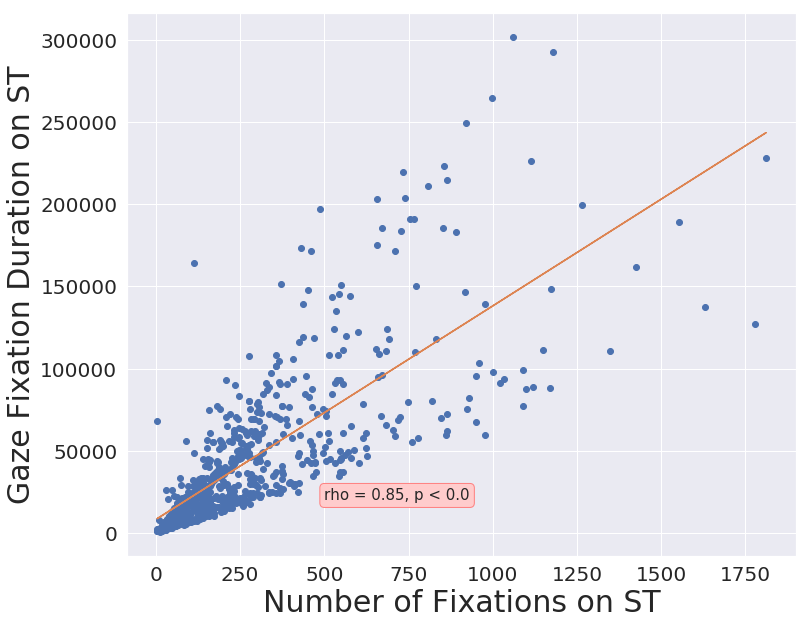

In [36]:
x = segments['FixS']
y = segments['TrtS']

corr2 = scipy.stats.spearmanr(x, y)
corr_coeff2 = str(round(corr2.correlation, 2))
corr_pValue2 = str(round(corr2.pvalue, 3))

corr2_infoString = "rho = " + corr_coeff2 + ", p < " + corr_pValue2

plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Number of Fixations on ST", fontsize = 30)
plt.ylabel("Gaze Fixation Duration on ST", fontsize = 30)

plt.plot(x, y, 'o')

plt.text(500, 20000, corr2_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

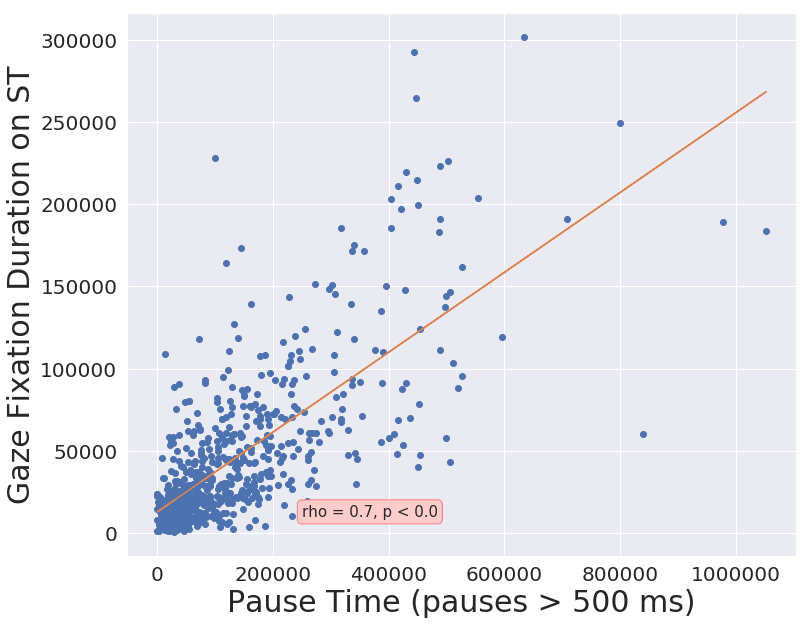

In [37]:
x = segments['TG500']
y = segments['TrtS']

corr3 = scipy.stats.spearmanr(x, y)
corr_coeff3 = str(round(corr3.correlation, 2))
corr_pValue3 = str(round(corr3.pvalue, 3))

corr3_infoString = "rho = " + corr_coeff3 + ", p < " + corr_pValue3

plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Pause Time (pauses > 500 ms)", fontsize = 30)
plt.ylabel("Gaze Fixation Duration on ST", fontsize = 30)

plt.plot(x, y, 'o')

plt.text(250000, 10000, corr3_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

## Create new variables

- $\mbox{Pause to Word Ratio (PWR)} = \frac{\mbox{number of pauses in segment}}{\mbox{number of words in segment}}$

In [40]:
segments["PWR2000"] = (segments["TB2000"] + 1) / segments["TokS"]
segments.head(3)

,Id,STseg,TTseg,Study,Session,SL,TL,Task,Text,Part,Nedit,Dur,FDur,PreGap,TG300,TD300,TB300,TG500,TD500,TB500,TG1000,TD1000,TB1000,TG2000,TD2000,TB2000,TG5000,TD5000,TB5000,Scatter,FixS,TrtS,FixT,TrtT,ParalFixS,ParalS,ParalFixT,ParalT,Ins,Del,MIns,MDel,AIns,ADel,SIns,SDel,TokS,LenS,TokT,LenT,LenMT,Yawat,String,TAGnbr,SAGnbr,ISgrpSeg,Cross,ICrossSeg,ITraSeg,ISTCSeg,HTot,HTotN,PWR2000
0,1,1,1,NJ12,P01_P3,en,hi,P,3,P01,1,106487,106487,25491,77579,3417,10,76955,4041,8,75583,5413,6,73774,7222,5,68095,12901,3,3,257,54884,155,32426,22,4264,39,9199,24,17,24,17,0,0,0,0,7,44,10,55,0,---,स्पीलबर्ग_ने_दारफुर_के_खिलाफ_बीजिंग_को_लाल_कार...,1.43,1.00,0.45,3.57,2.01,1.76,2.65,5.64,0.85,0.857143
1,2,2,2,NJ12,P01_P3,en,hi,P,3,P01,2,225062,225062,8081,197340,19641,51,191741,25240,37,180446,36535,21,168839,48142,13,155922,61059,8,5,367,69556,361,75706,11,4281,205,51580,171,137,171,137,0,0,0,0,31,169,36,176,0,---,चीनी_सरकार_को_प्रतीकात्मक_विरोध_दर्ज_कराने_के_...,2.52,2.35,1.51,7.77,2.97,2.82,3.36,7.24,0.83,0.451613
2,3,3,3,NJ12,P01_P3,en,hi,P,3,P01,2,443152,443152,5679,404139,33334,69,395029,42444,45,383297,54176,30,362142,75331,16,353015,84458,13,11,771,150488,478,98550,179,35709,184,39430,160,183,160,183,0,0,0,0,37,200,38,180,0,---,उनके_अलग_होने_से_डारफुर_में_संघर्ष_का_परचम_बुल...,2.81,3.22,1.55,5.54,2.72,3.15,3.60,7.11,0.79,0.459459


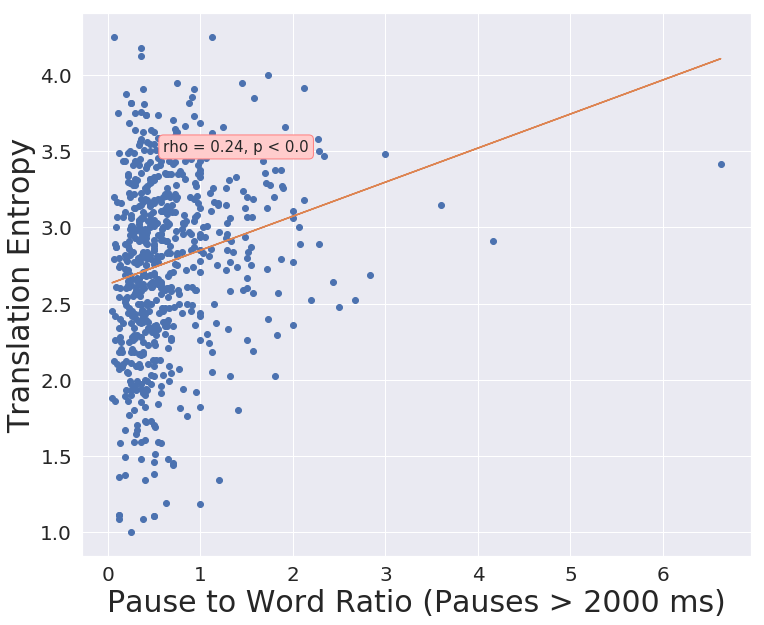

In [45]:
x = segments['PWR2000']
y = segments['ITraSeg']

corr7 = scipy.stats.spearmanr(x, y)
corr_coeff7 = str(round(corr7.correlation, 2))
corr_pValue7 = str(round(corr7.pvalue, 3))

corr7_infoString = "rho = " + corr_coeff7 + ", p < " + corr_pValue7

plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Pause to Word Ratio (Pauses > 2000 ms)", fontsize = 30)
plt.ylabel("Translation Entropy", fontsize = 30)

plt.plot(x, y, 'o')

plt.text(0.6, 3.5, corr7_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

## Analyze segments in specific text

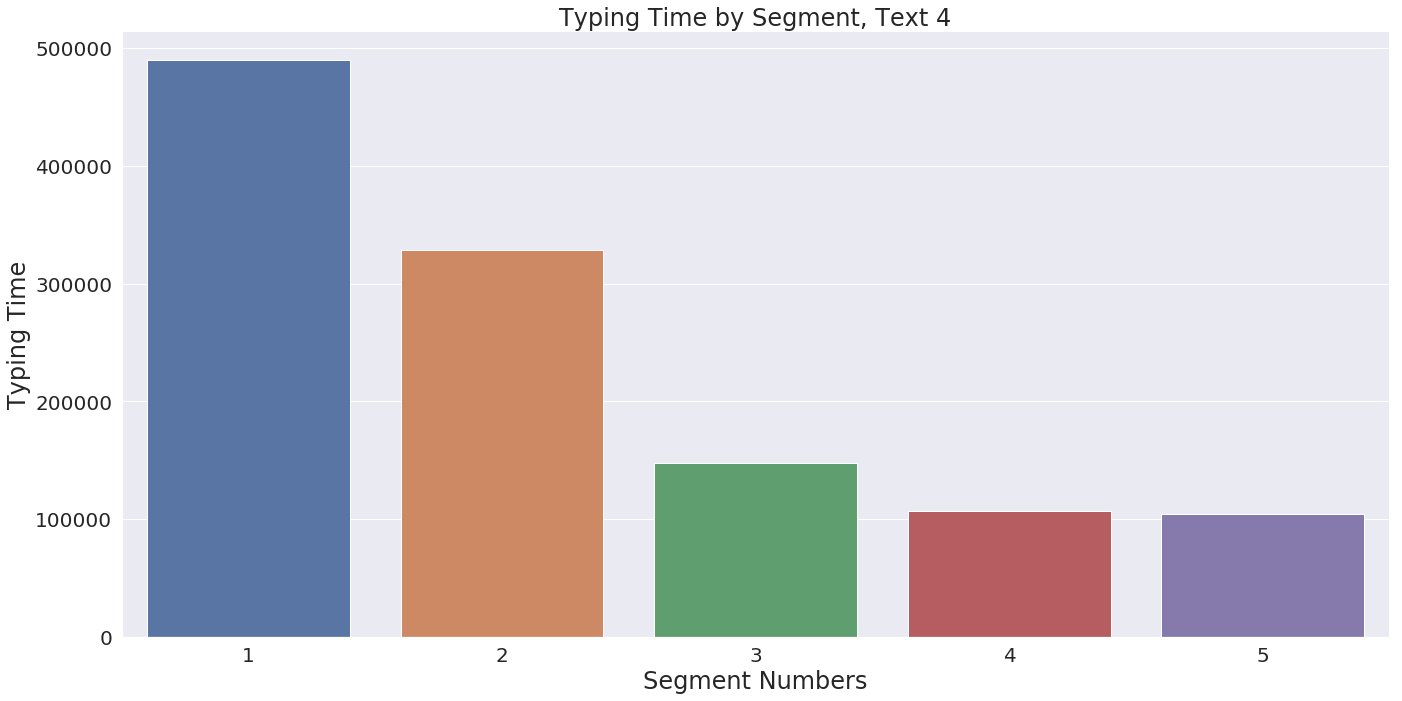

In [46]:
segments_Text1 = segments[segments['Text'] == 4]

sg_text1_groupedBySeg = segments_Text1.groupby("Id").mean().reset_index()

ax9 = sns.catplot(x="Id",
                 y="FDur",
                 kind="bar",
                 data=sg_text1_groupedBySeg,
                 height=10,
                 aspect=2
                )
ax9.set(ylabel='Typing Time', xlabel='Segment Numbers', title='Typing Time by Segment, Text 4')
ax9.set_xticklabels(size = 20)
plt.show()

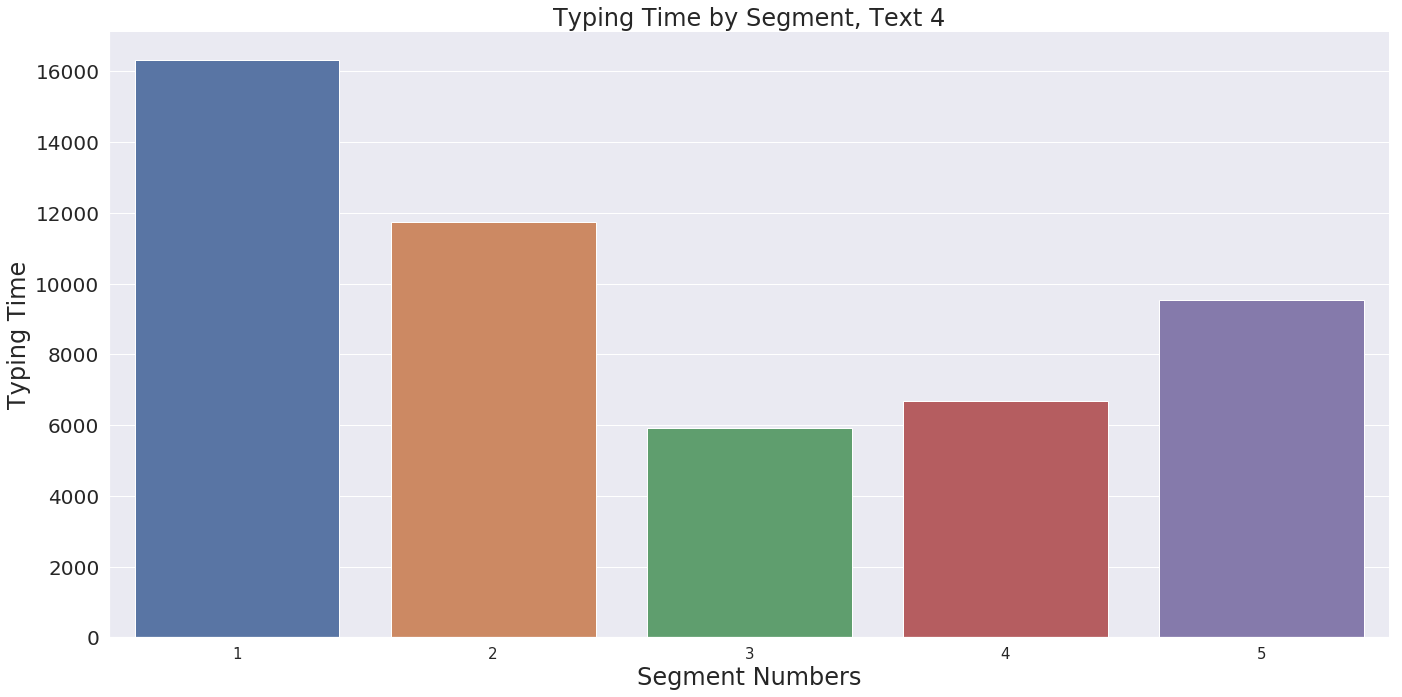

In [47]:
# normalize segment typing time by segment length
segments["nDur"] = segments["FDur"]/segments["TokS"]

segments_Text1 = segments[segments['Text'] == 4]

sg_text1_groupedBySeg = segments_Text1.groupby("Id").mean().reset_index()

ax9 = sns.catplot(x="Id",
                 y="nDur",
                 kind="bar",
                 data=sg_text1_groupedBySeg,
                 height=10,
                 aspect=2
                )
ax9.set(ylabel='Typing Time', xlabel='Segment Numbers', title='Typing Time by Segment, Text 4')
ax9.set_xticklabels(size = 15)
plt.show()

# The Source Token (i.e., the word)
===================================================
## .st tables: each row is one source token

In [6]:
# read ST tables
sTokens = TPRDB.readTPRDBtables(["SG12/Tables/"], "*st", path="/data/critt/tprdb/TPRDB/", verbose = 1)
sTokens.head(10)

SG12/Tables/


,Id,Study,Session,SL,TL,Task,Text,Part,STseg,SToken,Lemma,SGid,SGroup,SGx,SGnbr,STime,Cur,Ins,Del,Pause,Dur,Sdur,Prob1,Prob2,PoS,UPoS,TGroup,TGid,TGnbr,Munit,Cross,Edit1,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,ParFixS1,ParTrtS1,ParFixT1,ParTrtT1,Edit2,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,ParFixS2,ParTrtS2,ParFixT2,ParTrtT2,TimeR,DurR,EditR,Runit,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,InEff,Yawat,PUnbr,PUdur,PUpause,PUsid,PUtid,PUslen,PUtlen,Edit,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,1,SG12,P01_E5,en,de,E,5,P01,1,Sociology,---,1,Sociology,0,1,0,0,0,0,0,0,0,-4.8027,-50.0000,NN,NOUN,Die_Soziologie,1+2,2,0,2,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,3540,23477,360,360,0,82,360,17141,0,0,0,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,2,19,0.8261,0.6666,1,1.000,0.0000,2,0.8261,0.6666,2,0.8261,0.6666
1,2,SG12,P01_E5,en,de,E,5,P01,1,is,---,2,is,0,1,0,10,0,0,0,0,0,-2.0970,-6.4679,VBZ,AUX,ist,3,1,0,2,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,1,23,1.0000,0.0000,1,1.000,0.0000,2,0.8261,0.6666,2,0.8261,0.6666
2,3,SG12,P01_E5,en,de,E,5,P01,1,a,---,3,a,0,1,0,13,0,0,0,0,0,-1.7608,-3.2048,DT,DET,eine,4,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,2,263,660,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,1,23,1.0000,0.0000,1,1.000,0.0000,1,1.0000,0.0000,1,1.0000,0.0000
3,4,SG12,P01_E5,en,de,E,5,P01,1,relatively,---,4,relatively,0,1,0,15,0,0,0,0,0,-4.1982,-4.8795,RB,ADV,relativ,5,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,8,236,1173,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,2,22,0.9565,0.2580,1,1.000,0.0000,2,0.9565,0.2580,2,0.9565,0.2580
4,5,SG12,P01_E5,en,de,E,5,P01,1,new,---,5,new,0,1,0,26,0,0,0,0,0,-2.9987,-5.9008,JJ,ADJ,neue,6,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,5,264,1193,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,3,19,0.8261,0.8077,1,1.000,0.0000,2,0.9565,0.2580,4,0.7826,1.0534
5,6,SG12,P01_E5,en,de,E,5,P01,1,academic,---,6,academic,0,1,0,30,0,0,0,0,0,-4.4112,-6.5726,JJ,ADJ,wissenschaftliche,7,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,37,203,5220,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,3,17,0.7391,1.0676,2,0.913,0.4262,1,1.0000,0.0000,3,0.7391,1.0676
6,7,SG12,P01_E5,en,de,E,5,P01,1,discipline,---,7,discipline,0,1,0,39,0,0,0,0,0,-4.3502,-6.4190,NN,NOUN,Disziplin,8,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,18,133,4911,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,3,20,0.8696,0.6784,2,0.913,0.4262,2,0.9130,0.4262,3,0.8696,0.6784
7,8,SG12,P01_E5,en,de,E,5,P01,1,.,---,8,.,0,1,0,49,0,0,0,0,0,-1.4170,-5.4700,.,PUNCT,.,9,1,0,1,---,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,2,963,1619,0,0,0,0,0.00,---,0,0,0,0,0,0,0,---,1,23,1.0000,0.0000,1,1.000,0.0000,1,1.0000,0.0000,1,1.0000,0.0000
8,9,SG12,P01_E5,en,de,E,5,P01,2,It,---,9,It,1,1,0,51,4,6,172,3494,0,-2.0678,-6.3669,PRP,PRON,Sie,10,1,1,1,[sE####]Sie_,21887,3494,172,0,0,2,346,8,1681,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,13,223,2402,2,346,8,1681,1.75,---,2,1092,1030,9+10,10+11,2,2,[sE####]Sie_,2,22,0.9565,0.2580,1,1.000,0.0000,1,1.0000,0.0000,2,0.9565,0.2580
9,10,SG12,P01_E5,en,de,E,5,P01,2,emerged,---,10,emerged,1,1,0,54,8,8,19782,3197,0,-4.5299,-5.7091,VBD,VERB,entstand,11,1,2,1,[hcigiez_],19594,2121,19594,1226,4175,0,0,0,0,entstand,25569,1076,188,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,48,543,10882,0,0,0,0,1.78,---,3,374,19594,10,11,1,1,[hcigiez_]entstand,8,10,0.4348,2.3180,1,1.000,0.0000,4,0.5217,1.4127,8,0.4348,2.3180


## How many source tokens?

In [7]:
sTokens.shape

(19606, 93)

## Create new IDs

In [51]:
sTokens['Text_Id'] = sTokens["Text"].astype(str) + "_" + sTokens["Id"].astype(str)
textID = sTokens.pop('Text_Id')
sTokens.insert(0, 'Text_Id', textID)
sTokens.head(3)

,Text_Id,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,Lemma,STid,SGroup,STime,Sdur,Prob1,Prob2,PoS,UPoS,TGroup,TTid,SAGidx,SAGnbr,TAGnbr,Munit,Edit1,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,FixS1,ParalS1,FixT1,ParalT1,Edit2,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,FixS2,ParalS2,FixT2,ParalT2,EditR,Runit,TimeR,DurR,Ins,Del,Dur,Cross,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,InEff,Yawat,Edit,PUnbr,PUdur,PUpause,PUsid,PUtid,PUslen,PUtlen,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,3_1,1,1,NJ12,P01_P3,en,hi,P,3,P01,Spielberg,Spielberg,1,Spielberg,0,0,-5.9908,-50.0,NNP,PROPN,स्पीलबर्ग_ने,1+2,1,1,2,1,_VS[SV]ने,25491,8596,25491,12627,8711,6,1082,24,6113,---,0,0,0,12627,8711,0,0,0,0,---,0,0,0,5,2,8596,2,624,31793,50,567,0,40,567,5407,56,316,12494,0.54,---,_VS[SV]ने,2,1326,25491,1,1+2,1,2,7,6,0.4286,2.3599,1,1.0000,0.0000,4,0.5714,1.5216,9,0.3571,2.8352
1,3_2,2,1,NJ12,P01_P3,en,hi,P,3,P01,shows,show,2,shows,0,0,-4.0278,-50.0,VBZ,VERB,दिखाया,10,1,1,1,2,दिखाया,56379,811,281,0,0,0,0,1,391,[है],64023,0,514,0,514,0,0,0,0,---,0,0,0,6,2,811,9,1263,31621,133,433,0,67,433,13338,19,149,4293,1.00,---,दिखाया[है],2,1092,1809,2+5,9+10,2,2,11,4,0.2857,3.2359,4,0.7857,1.0892,7,0.1429,2.5495,13,0.0714,3.6645
2,3_3,3,1,NJ12,P01_P3,en,hi,P,3,P01,Beijing,Beijing,3,Beijing,0,0,-5.3595,-50.0,NNP,PROPN,बीजिंग_को,6+7,1,1,2,2,को_,54024,265,19937,8017,9278,0,0,1,79,[से_अधिक_],108031,1311,1544,933,78,0,0,7,1212,---,0,0,0,3,8,1576,-4,1731,35147,250,433,0,40,433,9508,9,466,2330,0.90,---,को_[से_अधिक_],2,265,19937,3,7,1,1,8,5,0.3571,2.6385,4,0.7143,1.2917,8,0.4286,2.5567,13,0.1429,3.6645


## Average values by this new ID

In [52]:
st_groupedByTextID = sTokens.groupby("Text_Id").mean().reset_index()
st_groupedByTextID.head(4)

,Text_Id,Id,STseg,Text,STime,Sdur,Prob1,Prob2,SAGidx,SAGnbr,TAGnbr,Munit,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,FixS1,ParalS1,FixT1,ParalT1,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,FixS2,ParalS2,FixT2,ParalT2,Runit,TimeR,DurR,Ins,Del,Dur,Cross,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,InEff,PUnbr,PUdur,PUpause,PUslen,PUtlen,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,1_1,1.0,1.0,1.0,0.0,0.0,-4.9463,-50.0000,0.600000,0.866667,0.866667,1.000000,14272.000000,10225.466667,12186.733333,6008.800000,3318.066667,25.266667,7186.000000,5.800000,983.333333,15183.066667,1316.733333,1952.000000,4061.800000,3938.933333,2.600000,575.333333,0.866667,119.533333,0.066667,51820.4,137.333333,4.000000,1.800000,11686.866667,1.200000,8494.866667,128275.666667,153.266667,307.533333,0.000000,14.800000,307.533333,3196.466667,126.600000,690.666667,22987.466667,0.918667,1.733333,685.400000,12186.733333,0.800000,0.800000,6.0,3.933333,0.262233,2.2062,2.0,0.768913,0.5665,3.0,0.662220,0.9056,7.0,0.235560,2.4226
1,1_10,10.0,2.0,1.0,0.0,0.0,-5.6409,-50.0000,1.066667,1.400000,1.600000,1.000000,85284.666667,3424.800000,6335.666667,2096.933333,2702.866667,3.400000,517.866667,13.533333,2115.533333,39218.666667,429.466667,515.866667,1488.400000,1504.133333,0.133333,9.600000,0.933333,297.266667,0.000000,0.0,0.000000,7.866667,2.066667,5121.000000,2.333333,24820.933333,51169.400000,163.200000,984.866667,0.466667,21.333333,244.266667,3326.200000,34.533333,438.600000,5850.066667,0.658667,2.133333,1079.666667,6688.133333,1.800000,1.200000,10.0,2.066667,0.137793,3.1069,4.0,0.351113,1.6895,5.0,0.271113,2.0729,10.0,0.137793,3.1069
2,1_100,100.0,7.0,1.0,0.0,0.0,-1.4170,-4.7483,2.200000,2.266667,1.933333,1.400000,568927.266667,6696.733333,5578.466667,1331.466667,3286.800000,13.666667,2004.000000,7.733333,2398.133333,255094.866667,1853.266667,1150.200000,80.066667,805.066667,0.133333,71.000000,10.466667,662.466667,0.000000,0.0,0.000000,6.066667,7.200000,9638.800000,8.133333,392241.200000,392241.200000,44.533333,468.600000,0.133333,1.133333,56.800000,405.466667,27.133333,410.533333,3823.466667,1.225333,3.600000,1680.533333,6388.733333,3.133333,2.000000,10.0,3.000000,0.200020,2.8729,5.0,0.315580,1.9301,8.0,0.164453,2.7899,14.0,0.075580,3.7736
3,1_101,101.0,8.0,1.0,0.0,0.0,-2.9186,-50.0000,0.866667,1.466667,1.666667,1.533333,578335.333333,5626.333333,3514.333333,1768.333333,242.800000,9.533333,3397.000000,3.333333,583.933333,250672.800000,1990.666667,644.800000,1859.533333,451.200000,6.533333,474.400000,3.466667,202.066667,0.000000,0.0,0.000000,7.666667,3.666667,9459.800000,4.200000,511187.200000,511187.200000,135.466667,551.666667,0.333333,7.200000,154.266667,982.733333,29.800000,412.933333,5847.533333,1.147333,2.600000,2321.200000,4882.866667,2.733333,2.133333,8.0,3.933333,0.262247,2.4635,3.0,0.520033,1.1589,7.0,0.208887,2.4989,10.0,0.146693,3.0566


In [53]:
st_groupedByTextID.shape

(847, 67)

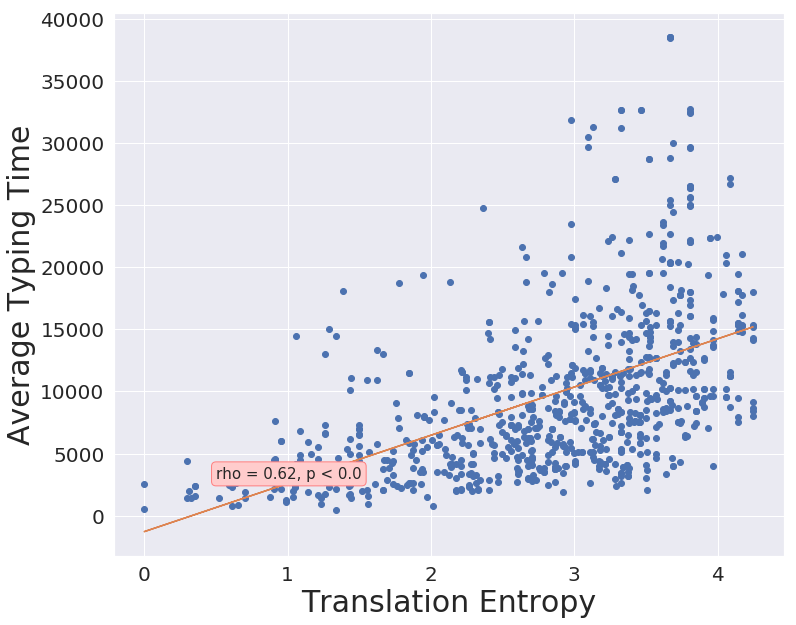

In [54]:
x = st_groupedByTextID['HTra']
y = st_groupedByTextID['Dur']

corr5 = scipy.stats.spearmanr(x, y)
corr_coeff5 = str(round(corr5.correlation, 2))
corr_pValue5 = str(round(corr5.pvalue, 3))

corr5_infoString = "rho = " + corr_coeff5 + ", p < " + corr_pValue5

plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Translation Entropy", fontsize = 30)
plt.ylabel("Average Typing Time", fontsize = 30)

plt.plot(x, y, 'o')

plt.text(0.5, 3000, corr5_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

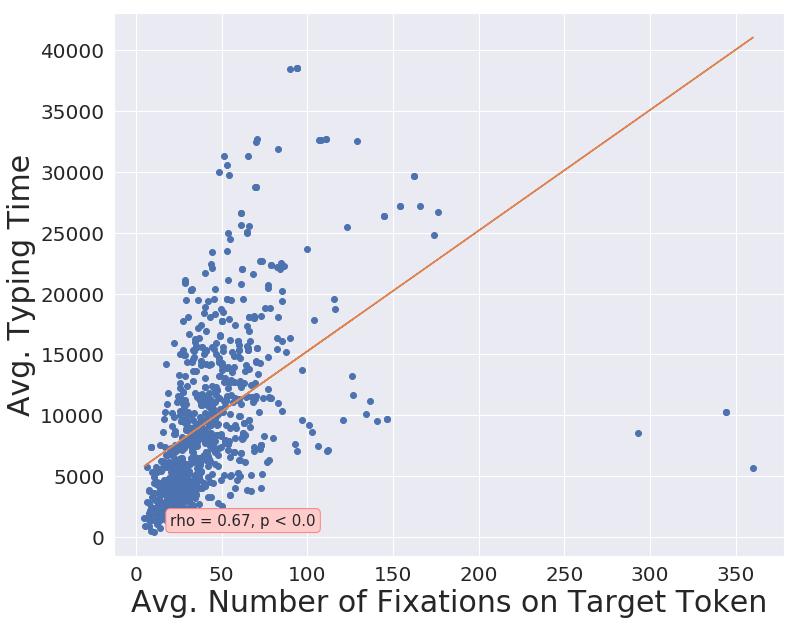

In [55]:
x = st_groupedByTextID['FixT']
y = st_groupedByTextID['Dur']

corr6 = scipy.stats.spearmanr(x, y)
corr_coeff6 = str(round(corr6.correlation, 2))
corr_pValue6 = str(round(corr6.pvalue, 3))

corr6_infoString = "rho = " + corr_coeff6 + ", p < " + corr_pValue6

plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Avg. Number of Fixations on Target Token", fontsize = 30)
plt.ylabel("Avg. Typing Time", fontsize = 30)

plt.plot(x, y, 'o')

plt.text(20, 1000, corr6_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

# Keystroke
=======================
## .kd tables: each row is one keystroke

In [57]:
# read kd tables
keystrokes = TPRDB.readTPRDBtables(["NJ12/Tables/"], "*kd", path="/data/critt/tprdb/TPRDB/", verbose = 1)
keystrokes.head(10)

NJ12/Tables/


,Id,Study,Session,SL,TL,Task,Text,Part,Time,Pause,Border,Type,Cursor,Char,TTseg,STid,TTid,Strokes,Dur,EdStr,LsDist,Draft,DistCur,DistTTid
0,0,NJ12,P01_P3,en,hi,P,3,P01,25491,25491,3,Mins,9,_,1,1,1,1,0,0,0,0,1,1
1,1,NJ12,P01_P3,en,hi,P,3,P01,25709,218,1,Mins,10,V,1,1,2,1,0,0,0,0,1,0
2,2,NJ12,P01_P3,en,hi,P,3,P01,25772,63,0,Mins,11,S,1,1,2,1,0,0,0,0,0,0
3,3,NJ12,P01_P3,en,hi,P,3,P01,26630,858,0,Mdel,11,S,1,1,2,1,0,0,0,0,1,0
4,4,NJ12,P01_P3,en,hi,P,3,P01,26817,187,0,Mdel,10,V,1,1,2,1,0,0,0,0,0,0
5,5,NJ12,P01_P3,en,hi,P,3,P01,33993,7176,0,Mins,10,न,1,1,2,1,0,0,0,0,1,0
6,6,NJ12,P01_P3,en,hi,P,3,P01,34087,94,0,Mins,11,े,1,1,2,1,0,0,0,0,24,5
7,7,NJ12,P01_P3,en,hi,P,3,P01,54024,19937,1,Mins,35,क,1,3,7,1,0,0,0,0,1,0
8,8,NJ12,P01_P3,en,hi,P,3,P01,54133,109,0,Mins,36,ो,1,3,7,1,0,0,0,0,1,0
9,9,NJ12,P01_P3,en,hi,P,3,P01,54289,156,0,Mins,37,_,1,3,7,1,0,0,0,0,10,2


In [58]:
keystrokes.shape

(88950, 24)

# Do translators pause more before deleting text or inserting text?

In [59]:
kd_groupedByType = keystrokes.groupby("Type").mean().reset_index()

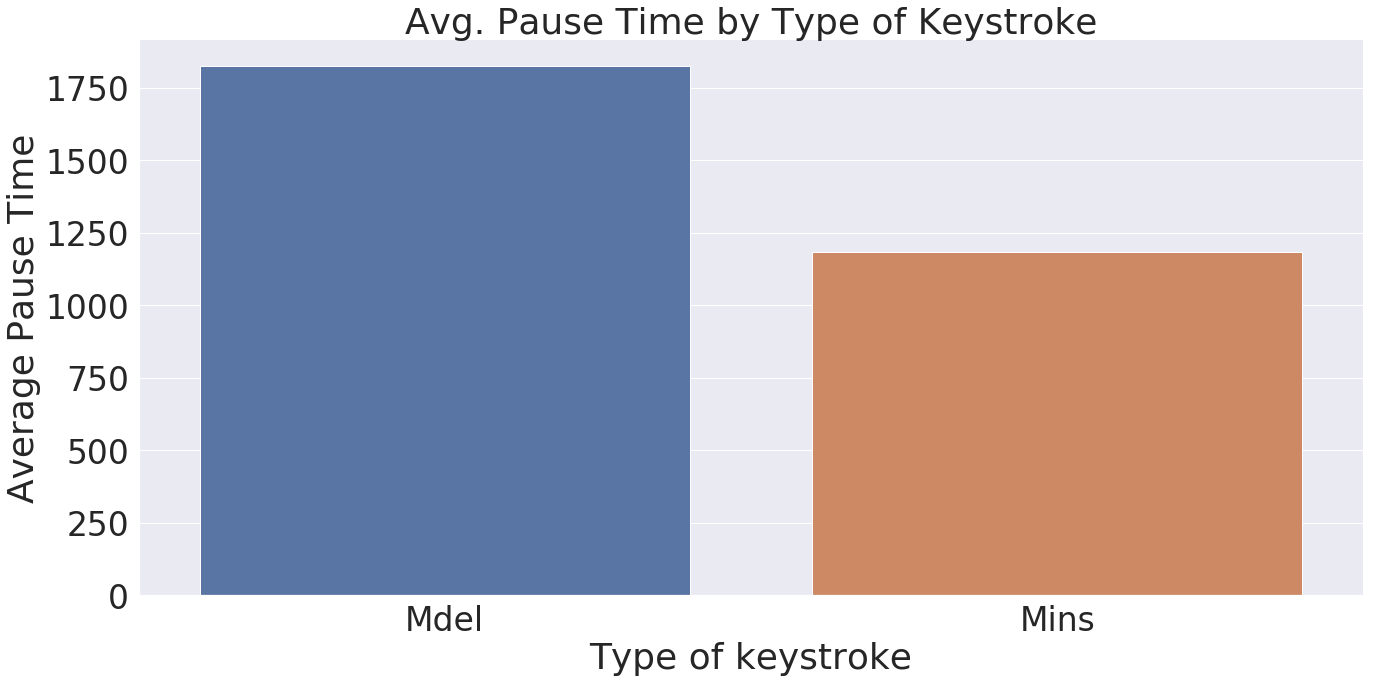

In [60]:
sns.set(font_scale = 3)
ax11 = sns.catplot(x="Type",
                 y="Pause",
                 kind="bar",
                 data=kd_groupedByType,
                 height=10,
                 aspect=2
                )
ax11.set(ylabel='Average Pause Time', xlabel='Type of keystroke', title='Avg. Pause Time by Type of Keystroke')
plt.show()

## How many times do translators copy and paste text?

In [61]:
# how many times does someone copy and paste text?
insertions = keystrokes[keystrokes['Type'] == "Mins"]

insertions['Strokes'].value_counts()

1      67647
7         14
8         13
9         10
10         8
15         7
6          6
18         6
25         5
5          5
24         5
19         5
20         4
16         4
12         3
13         3
21         3
29         3
11         3
2          2
3          2
32         2
26         2
23         2
28         2
14         1
27         1
31         1
56         1
38         1
43         1
263        1
44         1
48         1
53         1
4          1
58         1
Name: Strokes, dtype: int64

## What did they copy and paste?

In [62]:
insertions[insertions['Strokes'] > 1]

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Pause,Border,Type,Cursor,Char,TTseg,STid,TTid,Strokes,Dur,EdStr,LsDist,Draft,DistCur,DistTTid
180,180,NJ12,P01_P3,en,hi,P,3,P01,299569,5273,1,Mins,149,सूडान_की_नीति_को_चीनी_समर्थन_के_खिलाफ_विरोध,2,27,31,43,0,0,0,0,1,0
508,508,NJ12,P01_P3,en,hi,P,3,P01,857366,6427,1,Mins,497,घनिष्ठ_संबंध_रखता_है,4,88,103,20,0,0,0,0,1,1
774,774,NJ12,P01_P3,en,hi,P,3,P01,1300628,2871,1,Mins,664,खार्तूम,5,116,134,7,0,0,0,1,1,0
1014,221,NJ12,P01_P4,en,hi,P,4,P01,377569,281,1,Mins,261,स्वच्छ_प्रौद्योगिकी_को_लागू_करने,2,46,50,32,0,0,0,0,9,0
1038,245,NJ12,P01_P4,en,hi,P,4,P01,469079,2761,1,Mins,319,वनों_की_कटाई_से_उत्सर्जन,2,55,67,24,0,0,0,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84771,33,NJ12,P21_P3,en,hi,P,3,P21,46582,2215,1,Mins,54,दारफुर_से_अधिक_,1,6,12,15,0,0,0,0,0,0
84797,59,NJ12,P21_P3,en,hi,P,3,P21,92368,2043,1,Mins,48,कि_बीजिंग_रेड_कार्ड_,1,5,9,20,0,0,0,0,4,2
84936,198,NJ12,P21_P3,en,hi,P,3,P21,172116,1217,1,Mins,149,स्टीवन_स्पीलबर्ग_ने_,2,19,29,20,0,0,0,0,1,1
87159,207,NJ12,P21_T1,en,hi,T,1,P21,129934,780,1,Mins,104,अस्पताल_की_नर्स_कॉलिन_नॉरिस_को_,2,9+10,21,31,0,0,0,0,13,1


In [64]:
sessions = TPRDB.readTPRDBtables(["NJ12/Tables/"], "*kd", path="/data/critt/tprdb/TPRDB/", verbose = 1)

NJ12/Tables/


In [66]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

sessions[(sessions["Session"] == "P01_T1")] 

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Pause,Border,Type,Cursor,Char,TTseg,STid,TTid,Strokes,Dur,EdStr,LsDist,Draft,DistCur,DistTTid
2746,0,NJ12,P01_T1,en,hi,T,1,P01,10920,10920,3,Mins,0,प,1,1,1,1,0,0,0,0,1,1
2747,1,NJ12,P01_T1,en,hi,T,1,P01,11076,156,1,Mins,1,प,1,2,2,1,0,0,0,0,1,0
2748,2,NJ12,P01_T1,en,hi,T,1,P01,11247,171,0,Mins,2,प,1,2,2,1,0,0,0,0,1,0
2749,3,NJ12,P01_T1,en,hi,T,1,P01,11403,156,0,Mins,3,प,1,2,2,1,0,0,0,0,0,0
2750,4,NJ12,P01_T1,en,hi,T,1,P01,11981,578,0,Mdel,3,प,1,2,2,1,0,0,0,0,1,0
2751,5,NJ12,P01_T1,en,hi,T,1,P01,12152,171,0,Mdel,2,प,1,2,2,1,0,0,0,0,1,0
2752,6,NJ12,P01_T1,en,hi,T,1,P01,12293,141,0,Mdel,1,प,1,2,2,1,0,0,0,0,1,1
2753,7,NJ12,P01_T1,en,hi,T,1,P01,12417,124,1,Mdel,0,प,1,1,1,1,0,0,0,0,0,0
2754,8,NJ12,P01_T1,en,hi,T,1,P01,24757,12340,0,Mins,0,क,1,1,1,1,0,0,0,0,1,0
2755,9,NJ12,P01_T1,en,hi,T,1,P01,24866,109,0,Mins,1,ा,1,1,1,1,0,0,0,0,1,0
